# NLSE


In [1]:
import matplotlib
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from matplotlib.ticker import ScalarFormatter

In [2]:
#### global definitions ####

# exact solution
def exact_solution(t, w):
    const = np.sqrt(2*w)
    return const*(1/np.cosh(const*t))


# training boundry
BOUNDRY = 10

# number of points
K_POINTS = 200

# iterations
ITER = 10000

# learning rate
LR = 1e-3

# omega
OMEGA = 0.5


# Labels
LABEL1 = "Output comparison"
LABEL2 = "Cost curve"
LABEL3 = "Residuals"

## First Model

Final Loss: 0.003942311741411686


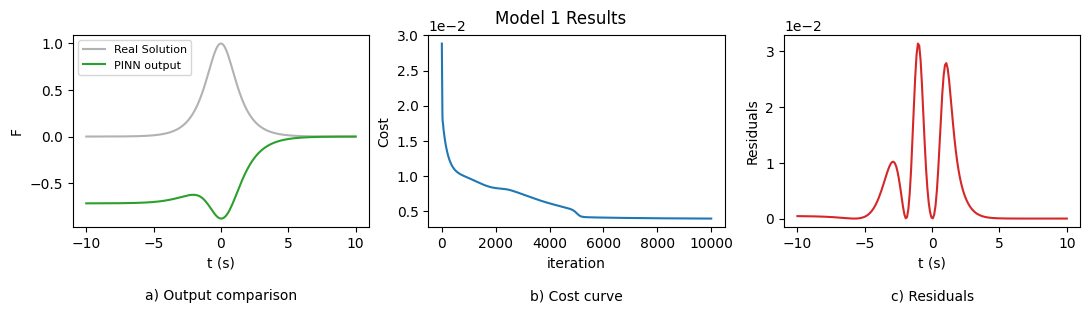

In [3]:
torch.manual_seed(123)
# model definitions
class Model_1(nn.Module):
    def __init__(self, peak=1.):
        super(Model_1, self).__init__()
        activation = nn.Sigmoid
        self.input_layer = nn.Sequential(*[
                        nn.Linear(1, 3),
                        activation()])
        self.output_layer = nn.Linear(3, 1)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.output_layer(x)
        return x

# init
pinn = Model_1()
t = torch.linspace(-BOUNDRY,BOUNDRY,K_POINTS).view(-1,1).requires_grad_(True)
optimiser = torch.optim.Adam(pinn.parameters(), lr=LR)

loss_array = []
for i in range(ITER):
    optimiser.zero_grad()

    F = pinn(t)
    dFdt = torch.autograd.grad(F, t, torch.ones_like(F), create_graph=True)[0]
    d2Fdt2 = torch.autograd.grad(dFdt, t, torch.ones_like(dFdt), create_graph=True)[0]

    physics_loss = torch.mean((d2Fdt2 -2*OMEGA*F + 2*F**3)**2)

    loss_array.append(physics_loss)

    physics_loss.backward()
    optimiser.step()


#### plots ####
t = torch.linspace(-BOUNDRY,BOUNDRY,K_POINTS).view(-1,1).requires_grad_(True)
F_analytical = exact_solution(t.detach(), OMEGA)

loss = [i.detach() for i in loss_array]

F = pinn(t)
dFdt = torch.autograd.grad(F, t, torch.ones_like(F), create_graph=True)[0]
d2Fdt2 = torch.autograd.grad(dFdt, t, torch.ones_like(dFdt), create_graph=True)[0]

residuals=(d2Fdt2 -2*OMEGA*F + 2*F**3)**2

physics_loss = torch.mean((d2Fdt2 -2*OMEGA*F + 2*F**3)**2)

#plt.tight_layout()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,2.5))
#plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.15, wspace=0.3, hspace=0.2)

ax1.plot(t.detach(), F_analytical[:,0], label="Real Solution", color="tab:grey", alpha=0.6)
ax1.plot(t.detach()[:,0], F.detach()[:,0], label="PINN output", color="tab:green")
ax1.legend(loc=2, prop={'size': 8})
ax1.set_xlabel("t (s)\n\na) " + LABEL1)
ax1.set_ylabel("F")

ax2.plot(loss, label="Loss", color="tab:blue")
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.set_xlabel("iteration\n\nb) " + LABEL2)
ax2.set_ylabel("Cost")

ax3.plot(t.detach()[:,0],residuals.detach()[:,0],label="Residuals",color="tab:red")
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax3.set_xlabel("t (s)\n\nc) " + LABEL3)
ax3.set_ylabel("Residuals")

fig.suptitle('Model 1 Results')

print(f"Final Loss: {physics_loss}")

resolution_value = 1200
fig.savefig("model1.pdf", format="pdf", dpi=resolution_value, bbox_inches = 'tight')

# Second Model

In [ ]:
torch.manual_seed(123)
# model definitions
class Model_2(nn.Module):
    def __init__(self):
        super(Model_2, self).__init__()
        activation = nn.Sigmoid
        self.input_layer = nn.Sequential(*[
                        nn.Linear(1, 64),
                        activation()])
        self.hidden = nn.Sequential(*[
                        nn.Sequential(*[
                            nn.Linear(64, 64),
                            activation()]) for _ in range(2)])
        self.output_layer = nn.Linear(64, 1)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.hidden(x)
        x = self.output_layer(x)
        return x

# init
pinn = Model_2()
t = torch.linspace(-BOUNDRY,BOUNDRY,K_POINTS).view(-1,1).requires_grad_(True)
optimiser = torch.optim.Adam(pinn.parameters(), lr=LR)

loss_array = []
for i in range(ITER):
    optimiser.zero_grad()

    F = pinn(t)
    dFdt = torch.autograd.grad(F, t, torch.ones_like(F), create_graph=True)[0]
    d2Fdt2 = torch.autograd.grad(dFdt, t, torch.ones_like(dFdt), create_graph=True)[0]

    physics_loss = torch.mean((d2Fdt2 -2*OMEGA*F + 2*F**3)**2)

    loss_array.append(physics_loss)

    physics_loss.backward()
    optimiser.step()


#### plots ####
t = torch.linspace(-BOUNDRY,BOUNDRY,K_POINTS).view(-1,1).requires_grad_(True)
F_analytical = exact_solution(t.detach(), OMEGA)

loss = [i.detach() for i in loss_array]

F = pinn(t)
dFdt = torch.autograd.grad(F, t, torch.ones_like(F), create_graph=True)[0]
d2Fdt2 = torch.autograd.grad(dFdt, t, torch.ones_like(dFdt), create_graph=True)[0]

residuals=(d2Fdt2 -2*OMEGA*F + 2*F**3)**2

physics_loss = torch.mean((d2Fdt2 -2*OMEGA*F + 2*F**3)**2)

#plt.tight_layout()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,2.5))
ax1.plot(t.detach(), F_analytical[:,0], label="Real Solution", color="tab:grey", alpha=0.6)
ax1.plot(t.detach()[:,0], F.detach()[:,0], label="PINN output", color="tab:green")
ax1.legend(loc=2, prop={'size': 8})
ax1.set_xlabel("t (s)\n\na) " + LABEL1)
ax1.set_ylabel("F")

ax2.plot(loss, label="Loss", color="tab:blue")
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.set_xlabel("iteration\n\nb) " + LABEL2)
ax2.set_ylabel("Cost")

ax3.plot(t.detach()[:,0],residuals.detach()[:,0],label="Residuals",color="tab:red")
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax3.set_xlabel("t (s)\n\nc) " + LABEL3)
ax3.set_ylabel("Residuals")

fig.suptitle('Model 2 Results')

print(f"Final Loss: {physics_loss}")


resolution_value = 1200
fig.savefig("model2.pdf", format="pdf", dpi=resolution_value, bbox_inches = 'tight')

# Third Model

In [ ]:
# init
torch.manual_seed(123)
pinn = Model_2()
t = torch.linspace(-BOUNDRY,BOUNDRY,K_POINTS).view(-1,1).requires_grad_(True)
optimiser = torch.optim.Adam(pinn.parameters(), lr=LR)

loss_array = []
for i in range(1000): #ITER
    optimiser.zero_grad()


    F = torch.mul(pinn(t),t+BOUNDRY)+1/torch.cosh(np.sqrt(2*OMEGA)*t)
    dFdt = torch.autograd.grad(F, t, torch.ones_like(F), create_graph=True)[0]
    d2Fdt2 = torch.autograd.grad(dFdt, t, torch.ones_like(dFdt), create_graph=True)[0]

    physics_loss = torch.mean((d2Fdt2 -2*OMEGA*F + 2*F**3)**2)

    loss_array.append(physics_loss)

    physics_loss.backward()
    optimiser.step()


#### plots ####
t = torch.linspace(-BOUNDRY,BOUNDRY,K_POINTS).view(-1,1).requires_grad_(True)
F_analytical = exact_solution(t.detach(), OMEGA)

loss = [i.detach() for i in loss_array]
F = torch.mul(pinn(t),t+BOUNDRY)+1/torch.cosh(np.sqrt(2*OMEGA)*t)
dFdt = torch.autograd.grad(F, t, torch.ones_like(F), create_graph=True)[0]
d2Fdt2 = torch.autograd.grad(dFdt, t, torch.ones_like(dFdt), create_graph=True)[0]

residuals=(d2Fdt2 -2*OMEGA*F + 2*F**3)**2

physics_loss = torch.mean((d2Fdt2 -2*OMEGA*F + 2*F**3)**2)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,2.5))
ax1.plot(t.detach(), F_analytical[:,0], label="Real Solution", color="tab:grey", alpha=0.6)
#ax1.plot(t.detach(), F_analytical[:,0], label="Real Solution", color="tab:grey", alpha=0.6, marker="*")
ax1.plot(t.detach()[:,0], F.detach()[:,0], label="PINN output", color="tab:green")
ax1.legend(loc=2, prop={'size': 8})
ax1.set_xlabel("t (s)\n\na) " + LABEL1)
ax1.set_ylabel("F")

ax2.plot(loss, label="Loss", color="tab:blue")
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.set_xlabel("iteration\n\nb) " + LABEL2)
ax2.set_ylabel("cost")

ax3.plot(t.detach()[:,0],residuals.detach()[:,0],label="Residuals",color="tab:red")
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax3.set_xlabel("t (s)\n\nc) " + LABEL3)
ax3.set_ylabel("residuals")

fig.suptitle('Model 3 Results\n')

print(f"Final Loss: {physics_loss}")

resolution_value = 1200
fig.savefig("model3_2.pdf", format="pdf", dpi=resolution_value, bbox_inches = 'tight')

# Fourth Model

In [ ]:
torch.manual_seed(123)
class Opt_Sech(nn.Module):
    def __init__(self, peak):
      super().__init__()
      self.peak = nn.Parameter(torch.tensor(peak))

    def forward(self, x, omega):
      return self.peak*(2.0 / (torch.exp(torch.sqrt(2 * omega) * x) + torch.exp(-torch.sqrt(2 * omega) * x)))

class Model_4(nn.Module):
    def __init__(self, peak=1.):
        super(Model_4, self).__init__()
        self.opt_sech = Opt_Sech(peak=peak)

    def forward(self, x, omega):
        x = self.opt_sech(x, omega)
        return x


# init
w_tensor = torch.Tensor([OMEGA])
pinn = Model_4(peak=2.)
t = torch.linspace(-BOUNDRY,BOUNDRY,K_POINTS).view(-1,1).requires_grad_(True)
optimiser = torch.optim.Adam(pinn.parameters(), lr=LR)

loss_array = []
for i in range(ITER):
    optimiser.zero_grad()

    F = pinn(t, w_tensor)
    dFdt = torch.autograd.grad(F, t, torch.ones_like(F), create_graph=True)[0]
    d2Fdt2 = torch.autograd.grad(dFdt, t, torch.ones_like(dFdt), create_graph=True)[0]

    physics_loss = torch.mean((d2Fdt2 -2*OMEGA*F + 2*F**3)**2)

    loss_array.append(physics_loss)

    physics_loss.backward()
    optimiser.step()



#### plots ####
t = torch.linspace(-BOUNDRY,BOUNDRY,K_POINTS).view(-1,1).requires_grad_(True)
F_analytical = exact_solution(t.detach(), OMEGA)

loss = [i.detach() for i in loss_array]

F = pinn(t, w_tensor)
dFdt = torch.autograd.grad(F, t, torch.ones_like(F), create_graph=True)[0]
d2Fdt2 = torch.autograd.grad(dFdt, t, torch.ones_like(dFdt), create_graph=True)[0]

residuals=(d2Fdt2 -2*OMEGA*F + 2*F**3)**2

physics_loss = torch.mean((d2Fdt2 -2*OMEGA*F + 2*F**3)**2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,2.5))
ax1.plot(t.detach(), F_analytical[:,0], label="Real Solution", color="tab:grey", alpha=0.6, marker="*")
ax1.plot(t.detach()[:,0], F.detach()[:,0], label="PINN output", color="tab:green")
ax1.legend(loc=2, prop={'size': 8})
ax1.set_xlabel("t (s)\n\na) " + LABEL1)
ax1.set_ylabel("F")

ax2.plot(loss, label="Loss", color="tab:blue")
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.set_xlabel("iteration\n\nb) " + LABEL2)
ax2.set_ylabel("loss")

ax3.plot(t.detach()[:,0],residuals.detach()[:,0],label="Residuals",color="tab:red")
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax3.set_xlabel("t (s)\n\nc) " + LABEL3)
ax3.set_ylabel("residuals")

fig.suptitle('Model 4 Results')

print(f"Final Loss: {physics_loss}")


# Data Training

In [ ]:
torch.manual_seed(123)

# visualize training data
##########
w = 2. # variable parameter
##########

N_obs = 50
noise = 0.05

t = torch.linspace(-BOUNDRY,BOUNDRY,500).view(-1,1).requires_grad_(True)
F_an = exact_solution(t.detach(), w)

t_obs = (torch.rand(N_obs).view(-1,1) - 0.5) * 2 * BOUNDRY
F_obs = exact_solution(t_obs, w) + noise*torch.randn_like(t_obs)

fig, (ax1) = plt.subplots(1, 1, figsize=(13,7))
ax1.plot(t.detach(), F_an, label="PINN output", color="tab:grey")
ax1.scatter(t_obs, F_obs, label="measures", color="tab:blue", alpha=0.6, marker="o", s=10**2)
ax1.set_xlabel("t (s)")
ax1.set_ylabel("F")
ax1.legend(loc=2, prop={'size': 15})

fig.suptitle('Simulated Measures')


In [ ]:
torch.manual_seed(123)

# visualize training data
##########
w = 2# variable parameter
##########

N_obs = 250
noise = 0.01

t = torch.linspace(-BOUNDRY,BOUNDRY,500).view(-1,1).requires_grad_(True)
F_an = exact_solution(t.detach(), w)

t_obs = (torch.rand(N_obs).view(-1,1) - 0.5) * 2 * BOUNDRY
F_obs = exact_solution(t_obs, w) + noise*torch.randn_like(t_obs)


pinn = Model_2()

loss_array = []
t = torch.linspace(-BOUNDRY,BOUNDRY,K_POINTS).view(-1,1).requires_grad_(True)

w_tensor = torch.nn.Parameter(torch.tensor([1.]))
w_array = []

optimiser = torch.optim.Adam(list(pinn.parameters())+[w_tensor], lr=0.001)

for i in range(ITER):
    optimiser.zero_grad()

    F = pinn(t)
    dFdt = torch.autograd.grad(F, t, torch.ones_like(F), create_graph=True)[0]
    d2Fdt2 = torch.autograd.grad(dFdt, t, torch.ones_like(dFdt), create_graph=True)[0]

    physics_loss = torch.mean((d2Fdt2 -2*w_tensor*F + 2*F**3)**2)

    F = pinn(t_obs)
    data_loss = torch.mean((F - F_obs)**2)

    loss = data_loss + 1e-2*physics_loss

    loss_array.append(loss)
    w_array.append(w_tensor.item())

    loss.backward()
    optimiser.step()



#### plots ####
t = torch.linspace(-BOUNDRY,BOUNDRY,K_POINTS).view(-1,1).requires_grad_(True)
F_analytical = exact_solution(t.detach(), w)

loss = [i.detach() for i in loss_array]

F = pinn(t)
dFdt = torch.autograd.grad(F, t, torch.ones_like(F), create_graph=True)[0]
d2Fdt2 = torch.autograd.grad(dFdt, t, torch.ones_like(dFdt), create_graph=True)[0]

residuals=(d2Fdt2 -2*w*F + 2*F**3)**2

physics_loss = torch.mean((d2Fdt2 -2*w*F + 2*F**3)**2)

plt.tight_layout()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,2.5))
ax1.plot(t.detach(), F_analytical[:,0], label="Real Solution", color="tab:grey", alpha=0.6)
ax1.plot(t.detach()[:,0], F.detach()[:,0], label="PINN output", color="tab:green")
ax1.legend(loc=2, prop={'size': 8})
ax1.set_xlabel("t")
ax1.set_ylabel("F")

ax2.plot(loss, label="Loss", color="tab:blue")
ax2.set_xlabel("iteration")
ax2.set_ylabel("loss")

ax3.plot(t.detach()[:,0],residuals.detach()[:,0],label="Residuals",color="tab:red")
ax3.set_xlabel("t")
ax3.set_ylabel("residuals")

fig.suptitle('Model 2 Results - Data Driven')

print(f"Final Loss: {physics_loss}")

print(f"ACCURACY:{(abs(w - w_tensor.item())/w)*100}")

In [ ]:
plt.plot(w_array)


In [ ]:
l_001 = [2.09, 1.73, 0.65, 0.72, 0.00063]
l_005 = [9.72, 8.63, 3.21, 3.68, 1.25]
l_01 = [15.86, 15.57, 6.25, 7.52, 2.44]

a = [50, 100, 150, 200, 250]

fig, (ax1) = plt.subplots(1, 1, figsize=(13,7))
ax1.plot(a, l_001, label="0.01", color="tab:blue", marker="o")
ax1.plot(a, l_005, label="0.05", color="tab:red", marker="o")
ax1.plot(a, l_01, label="0.1", color="tab:green", marker="o")


ax1.set_xlabel("Data Points")
ax1.set_ylabel("Accuracy")
ax1.legend(loc=1, prop={'size': 15})

fig.suptitle('Accuracy Variation')


